# Computational Exercise 1: A Vary Great, Very Harmonic, Wavefunction
We will apply the Variational Method to the Harmonic Oscillator.  In particular, we will optimize
the trial wavefunction given by 
\begin{equation}
\Phi(x) = {\rm exp}\left( -\alpha x^2 \right),
\end{equation}
where $\alpha$ is an adjustable parameter that will be variationally optimized.  In particular, the goal
will be to minimize the energy functional given by
\begin{equation}
E[\Phi(x)] = \frac{\int_{-\infty}^{\infty} \Phi^* (x) \: \hat{H} \: \Phi(x) dx }{\int_{-\infty}^{\infty} \Phi^* (x) \: \Phi(x) dx }
\end{equation}
by modulating the trial wavefunction through the adjustable parameter $\alpha$.

The Hamiltonian operator for Harmonic Oscillator is given by 
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + \frac{1}{2} k \: x^2.
\end{equation}
We will use a system of natural units where $\hbar = 1$, the mass of the particle $m = 1$, and the force constant of
the potential $k = 1$.

### Questions
1. What is the optimal value of $E[\Phi(x)]$ in natural units?  How does this value compare to the true ground state energy of the Harmonic Oscillator?
2. What is the optimal value of $\alpha$ in natural units?  How does $\Phi(x)$ with this value of $\alpha$ compare to the true ground state wavefunction?
3. What is the kinetic energy expectation value of the optimized trial wavefunction in natural units?
4. What is the potential energy expectation value of the optimized trial wavefunction in natural units?

### (Hopefully) Helpful Hints
You can represent your trial wavefunction numerically on the computer by creating an array of x-values, evaluating
the formula for your trial wavefunction at each of those x-values, and then storing each of those function values in another array.  The following lines of code will do this using $numpy$ arrays and the $numpy.exp$ function. 


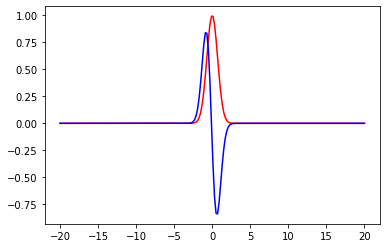

In [136]:
import numpy as np
from matplotlib import pyplot as plt

## Coordinate system
x_array = np.linspace(-20, 20, 200)

## define known natural units for the variables given for Harmonic Oscillator
k = 1
m = 1
h_bar = 1
    
alpha = 1

Phi = np.exp (-alpha * x_array**2)
Vx = 1/2. *x_array **2


x = x_array

## Create trial wavefunction

def trial_wf (alpha, x_array):
    return np.exp (-alpha * x_array**2)

def dfdx(fx_array, x_array):
    ### loop through values of fx and x and use forward finite-differences 
    ### to compute the d/dx of fx at each point and store in an array called 'fxp'
    ### make sure to poperly handle
    ### the last point where f(x_0 + dx) is not stored
    ### create a numpy array called fxp that has the same length
    ### and data type as the array of function values you are differentiating

    fxp = np.zeros_like(fx_array)
    
    for i in range (0,len(x_array)-1):
        if (i<(len(x_array)-1)):
            rise = fx_array[i + 1] - fx_array[i]
            run = x_array [i + 1] - x_array [i]
            slope = rise/run
            fxp[i] = slope
        else:
            rise = fx_array[i + 1] - fx_array[i-1]
            slope = rise/run
            fxp[i] = slope
    
    ### once you have computed all fxp values, return the array!
    return fxp

Phi_p = dfdx (Phi, x_array)

plt.plot(x_array, Phi, 'red', x_array, Phi_p, 'blue' )
plt.show()




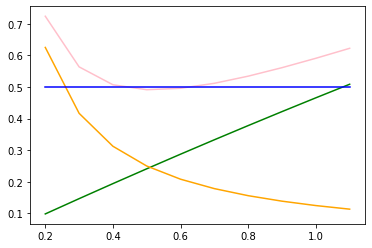

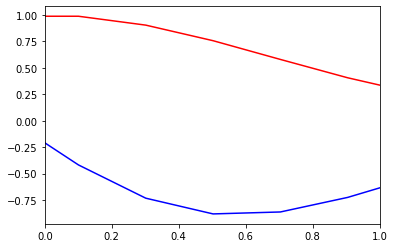

In [141]:
## convert x_array to just x 

x = x_array

## Define Kinetic Part

def TPhi (fx, x):
    # This takes the first derivative of fxp and stores it as fxp
    fxp = dfdx(fx,x)
    # This takes the first derivative of fxp and stores it as fxpp
    fxpp = dfdx (fxp,x)
    # Now return second derivative of fx multiplied by -1/2
    return -1/2 * fxpp

def T_func (fx, x):
    TP = TPhi (fx,x)
    dx = x[1] - x[0]
    num = 0
    den = 0
    for i in range (0, len(fx)):
        num = num + fx[i] *TP[i]*dx
        den = den + fx[i] **2 *dx 
    return num/den

## Define Potential Part

def VPhi (fx, x):
    return 1/2. * x**2 *fx

def V_func (fx, x):
    VP = VPhi (fx,x)
    dx = x[1] - x[0]
    num = 0
    den = 0
    for i in range (0, len(fx)):
        num = num + fx[i] *VP[i]*dx
        den = den + fx[i] **2 *dx 
    return num/den

################

def HPhi (fx, x):
    return TPhi (fx, x) + VPhi (fx,x)

# Function will take our trial wavefunction and our grid of x values and return the energy expectation value
# using rectable rule for the integrals
def E_of_Phi (fx,x):
    # get my dx value!
    dx = x[1] - x[0]
    # get my numerator function!
    hp = HPhi (fx, x) 
    phi_star = np.conj (fx)
    num_func = phi_star * hp
    # get my denominator function
    den_func = phi_star *fx
    
    # define numerator sum 
    num_sum = 0
    
    # define denominator sum
    den_sum = 0
    
    # Perform the loop to compute the rectangle approximation to the integrals!

    
    for i in range (0, len(x)):
        # Add the area of the numerator rectangle to num_sumjn
        num_sum = num_sum + num_func[i] *dx
        # Add the area of the denominator rectangle to den_sum
        den_sum = den_sum + den_func[i] *dx
    
    return num_sum/den_sum

## create various arrays for different alphas:

alpha = np.zeros (10)
T_values = np.zeros (10)
V_values = np.zeros (10)
E_values = np.zeros (10)

Real_GSE = np.zeros (10)

## Loop alphas ???

for a_array in range (0,10):
    alpha[a_array] = 0.1 * (a_array +2 )
    Phi = np.exp(-alpha[a_array] * x_array*x_array)
    
    Phi_trial = trial_wf (alpha[a_array], x_array)
    
    T_values[a_array] = T_func(Phi_trial,x_array)
    V_values[a_array] = V_func(Phi_trial,x_array)
    
    
    ## total computed values for E ???
    E_values[a_array] = T_values[a_array] + V_values[a_array]
    
    
    ## value for the real ground state energy (Real_GSE) for the Harmonic Oscillator
    Real_GSE[a_array] = np.sqrt (k/m) * 1/2


    
plt.plot (alpha, E_values, 'pink', alpha, T_values, 'green', alpha, V_values, 'orange', alpha, Real_GSE, 'blue')
    
plt.show()    
    


Phi_pp = dfdx(Phi_p, x_array)

plt.plot (x_array, Phi, 'red', x_array, Phi_p, 'blue' )
plt.xlim(0, 1)
plt.show()



In [167]:
## Find the minimum for the energy value and the optimal alpha value

# Min_array = FindMin(E_values, alpha)

def FindMin (fx,x):
    min_values = []
    for i in range(0, len(x)):
        min_value = min(x[i])

    return min(min_values)

# Min_value = min(min_values)

print("This is the Minimum Energy Value")
print (min(E_values))
print("This is the Real Ground State Value")
print (Real_GSE[0])
print("This is the Optimal Value of Alpha")
print (min(alpha))


This is the Minimum Energy Value
0.49129226966396855
This is the Real Ground State Value
0.5
This is the Optimal Value of Alpha
0.2


0.6222315138079147


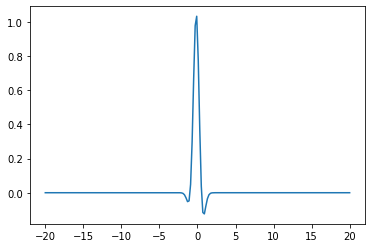

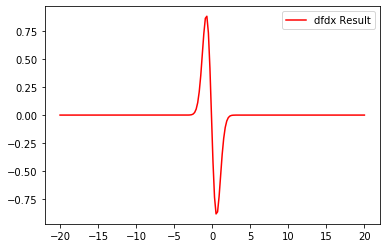

In [151]:
E_Trial = E_of_Phi(Phi, x_array)
print (E_Trial)


hp = HPhi(Phi, x_array)
plt.plot (x_array, np.conj(Phi)*hp)
plt.show()

#Plotting the entire numerator of our energy expectation value.

### Call dfdx on Phi to get the first derivative of Phi
Phi_p = dfdx(Phi, x_array)



plt.plot ( x_array, Phi_p, 'red', label = 'dfdx Result')


plt. legend()
plt.show()

### Call dfdx on Phi_p to get the second derivative of Phi
Phi_pp = dfdx(Phi_p, x_array)



### Questions
1. What is the optimal value of $E[\Phi(x)]$ in natural units?  How does this value compare to the true ground state energy of the Harmonic Oscillator?
2. What is the optimal value of $\alpha$ in natural units?  How does $\Phi(x)$ with this value of $\alpha$ compare to the true ground state wavefunction?
3. What is the kinetic energy expectation value of the optimized trial wavefunction in natural units?
4. What is the potential energy expectation value of the optimized trial wavefunction in natural units?



# Answers to Questions:

1. The optimal value of E in natural units is equal to the minumum value of the pink line shown in the graph above. This minimum is roughly below 0.5 at around 0.49. The actual optimal E value is calculated to be 0.49129226966396855 The real ground state energy can be seen as the green line in the graph above at y = 0.5. 
2. The optimal value of alpha as shown in the graph above is = 0.2. 
3. The kinetic energy expectation value of the optimized wavefunction is shown in the graph above with the multicolors. The kinetic portion shown by the green line is shown to be equal to 0.25. 
4. The potential energy expectation value of the optimized wavefunction is shown as the orange line in the graph above. You can see that the expectation value is equal to 0.25 at the optimal wavefunction. 